In [3]:
body = client_cred.get_object(Bucket=bucket,Key='311_Service_Requests_from_2010_to_Present_min.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [5]:
df_data_1.columns

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Closed Date',
       'Complaint Type', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Address Type', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

In [4]:
df_data_1['Complaint Type'].value_counts()

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                6
Outside Building                6
Appliance                       4
Mold                            1
Electric      

In [47]:
df_data_1['Incident Zip'].value_counts()

11226.0    215709
10467.0    173911
10458.0    169485
10453.0    162532
10468.0    148213
10457.0    146199
10452.0    146016
10456.0    132748
10031.0    123853
11225.0    120913
11213.0    118097
10032.0    110192
11207.0    108223
11212.0    106566
11233.0    106252
11221.0    101644
10460.0     96584
10472.0     93447
10040.0     88773
11216.0     88054
11203.0     87935
11208.0     86610
10033.0     83386
10462.0     79545
10463.0     78718
10034.0     72870
10459.0     71937
10466.0     69232
11230.0     64876
10451.0     63180
            ...  
10005.0       440
10280.0       343
10004.0       329
11001.0       273
11697.0       269
11040.0       112
10069.0        93
11109.0        73
10129.0        40
10162.0        15
11005.0        14
10020.0         5
10158.0         4
10112.0         4
11430.0         4
10803.0         4
10041.0         3
10103.0         3
10169.0         2
11241.0         2
10106.0         1
10118.0         1
10121.0         1
10105.0         1
10177.0   

In [53]:
df1 = df_data_1[ df_data_1['Complaint Type'].isin(['HEATING', 'HEAT/HOT WATER'])]
df1 = df1[df1['Borough'] == 'BRONX']
df1['complaint'] = 1
df1.rename(columns={'Incident Zip': 'ZipCode', 'Incident Address': 'Address'}, inplace = True)
df1.head(5)

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,ZipCode,Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude,complaint
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558,1
5,5,45530344,02/02/2020 07:52:08 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10456.0,1131 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.831381,-73.915218,1
10,10,45530349,02/02/2020 05:38:39 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10459.0,1032 ALDUS STREET,ALDUS STREET,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.823282,-73.887462,1
19,19,45529362,02/02/2020 01:38:25 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10473.0,880 BOYNTON AVENUE,BOYNTON AVENUE,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.821314,-73.876507,1
29,29,45528454,02/02/2020 10:25:32 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10463.0,3110 KINGSBRIDGE TERRACE,KINGSBRIDGE TERRACE,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.877620,-73.900116,1


In [9]:
body = client_cred.get_object(Bucket=bucket,Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body, usecols = ['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord'])
df_data_2.head()

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5,1005957.0,232162.0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0


In [54]:
df_data_2.columns

Index(['Lot', 'ZipCode', 'Address', 'LotArea', 'BldgArea', 'ResArea',
       'OfficeArea', 'RetailArea', 'NumBldgs', 'NumFloors', 'LotDepth',
       'BldgDepth', 'YearBuilt', 'YearAlter1', 'BuiltFAR', 'ResidFAR',
       'CommFAR', 'FacilFAR', 'XCoord', 'YCoord'],
      dtype='object')

In [55]:
df1.columns

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Closed Date',
       'Complaint Type', 'Location Type', 'ZipCode', 'Address', 'Street Name',
       'Address Type', 'City', 'Status', 'Resolution Description', 'Borough',
       'Latitude', 'Longitude', 'complaint'],
      dtype='object')

In [119]:
df = pd.merge(df_data_2, df1, on=['ZipCode', 'Address'], how='outer')
df.head(5)

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,...,Location Type,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude,complaint
0,1.0,10454.0,122 BRUCKNER BOULEVARD,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,10454.0,126 BRUCKNER BOULEVARD,13770.0,752.0,0.0,272.0,0.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,10454.0,138 BRUCKNER BOULEVARD,35000.0,39375.0,0.0,0.0,0.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17.0,10454.0,144 BRUCKNER BOULEVARD,2500.0,12500.0,12500.0,0.0,0.0,1.0,5.0,...,RESIDENTIAL BUILDING,BRUCKNER BOULEVARD,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.803778,-73.920245,1.0
4,17.0,10454.0,144 BRUCKNER BOULEVARD,2500.0,12500.0,12500.0,0.0,0.0,1.0,5.0,...,RESIDENTIAL BUILDING,BRUCKNER BOULEVARD,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.803778,-73.920245,1.0


In [120]:
df.columns

Index(['Lot', 'ZipCode', 'Address', 'LotArea', 'BldgArea', 'ResArea',
       'OfficeArea', 'RetailArea', 'NumBldgs', 'NumFloors', 'LotDepth',
       'BldgDepth', 'YearBuilt', 'YearAlter1', 'BuiltFAR', 'ResidFAR',
       'CommFAR', 'FacilFAR', 'XCoord', 'YCoord', 'Unnamed: 0', 'Unique Key',
       'Created Date', 'Closed Date', 'Complaint Type', 'Location Type',
       'Street Name', 'Address Type', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'complaint'],
      dtype='object')

In [121]:
df = df.drop(['XCoord', 'YCoord', 'Unnamed: 0', 'Unique Key','Created Date', 'Closed Date', 'Complaint Type', 'Borough', 'Latitude', 'Longitude'], axis=1)

In [122]:
df.columns

Index(['Lot', 'ZipCode', 'Address', 'LotArea', 'BldgArea', 'ResArea',
       'OfficeArea', 'RetailArea', 'NumBldgs', 'NumFloors', 'LotDepth',
       'BldgDepth', 'YearBuilt', 'YearAlter1', 'BuiltFAR', 'ResidFAR',
       'CommFAR', 'FacilFAR', 'Location Type', 'Street Name', 'Address Type',
       'City', 'Status', 'Resolution Description', 'complaint'],
      dtype='object')

In [128]:
df.fillna(0, inplace=True)
df['complaint'].value_counts()

1.0    606778
0.0     72544
Name: complaint, dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679322 entries, 0 to 679321
Data columns (total 25 columns):
Lot                       679322 non-null float64
ZipCode                   679322 non-null float64
Address                   679322 non-null object
LotArea                   679322 non-null float64
BldgArea                  679322 non-null float64
ResArea                   679322 non-null float64
OfficeArea                679322 non-null float64
RetailArea                679322 non-null float64
NumBldgs                  679322 non-null float64
NumFloors                 679322 non-null float64
LotDepth                  679322 non-null float64
BldgDepth                 679322 non-null float64
YearBuilt                 679322 non-null float64
YearAlter1                679322 non-null float64
BuiltFAR                  679322 non-null float64
ResidFAR                  679322 non-null float64
CommFAR                   679322 non-null float64
FacilFAR                  679322 non-nul

In [130]:
from scipy.stats import spearmanr
df.corr(method='pearson')['complaint']

Lot          -0.018321
ZipCode      -0.021647
LotArea       0.002901
BldgArea      0.180353
ResArea       0.194584
OfficeArea   -0.011874
RetailArea    0.029316
NumBldgs     -0.092956
NumFloors     0.232070
LotDepth     -0.066047
BldgDepth     0.171344
YearBuilt    -0.106286
YearAlter1    0.104015
BuiltFAR      0.236966
ResidFAR      0.185818
CommFAR      -0.047436
FacilFAR      0.138204
complaint     1.000000
Name: complaint, dtype: float64

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y = df['complaint']
x = df[['BldgArea', 'ResArea', 'NumFloors', 'BldgDepth', 'YearBuilt', 'YearAlter1', 'BuiltFAR', 'ResidFAR', 'FacilFAR']]
x = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)

In [133]:
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

score = logisticRegr.score(X_test, y_test)
print(score)

0.9311618914900612


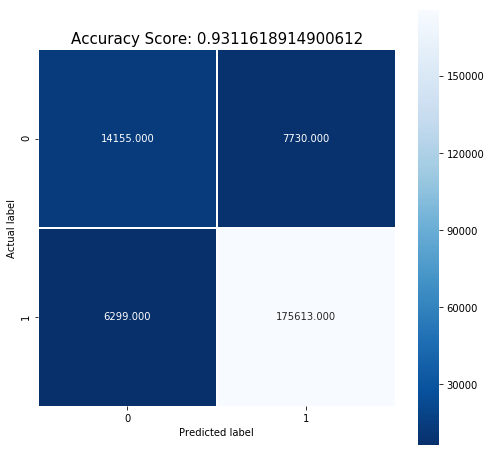

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);